In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_excel(r"C:\Users\apsay\Downloads\Dataset_Identify customer segments for online retail with the use of K-means clustering\Online Retail.xlsx")


In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


## Preprocessing steps from Component 3


In [4]:
df.dropna(axis=0, inplace=True)  # Dropping rows with missing values


In [5]:
df.drop_duplicates(inplace=True)  # Removing duplicate entries


In [6]:
df['CustomerID'] = df['CustomerID'].astype(int)  # Convert CustomerID from float to int


In [7]:
#Feature Engineering
df['TotalSales'] = df['Quantity'] * df['UnitPrice']
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
df['HourOfDay'] = df['InvoiceDate'].dt.hour
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,DayOfWeek,HourOfDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2,8


In [8]:
# Encoding categorical variables
df_encoded = pd.get_dummies(df, columns=['Country', 'Description', 'StockCode'], drop_first=True)


## Standardize the data


In [9]:
# Selecting only numeric columns for clustering
numerical_columns = ['Quantity', 'UnitPrice', 'CustomerID', 'TotalSales', 'DayOfWeek', 'HourOfDay']
df_encoded_numeric = df_encoded[numerical_columns]

# Standardize the data
scaler = StandardScaler()
df_encoded_numeric = scaler.fit_transform(df_encoded_numeric)
df_encoded_numeric = pd.DataFrame(df_encoded_numeric, columns=numerical_columns)

# Display the resultant DataFrame
print(df_encoded_numeric.head())


   Quantity  UnitPrice  CustomerID  TotalSales  DayOfWeek  HourOfDay
0 -0.024705  -0.013246    1.498736   -0.012347  -0.312287   -2.06757
1 -0.024705  -0.001205    1.498736   -0.000636  -0.312287   -2.06757
2 -0.016714  -0.010379    1.498736    0.003221  -0.312287   -2.06757
3 -0.024705  -0.001205    1.498736   -0.000636  -0.312287   -2.06757
4 -0.024705  -0.001205    1.498736   -0.000636  -0.312287   -2.06757


## Determining the Optimal number of clusters

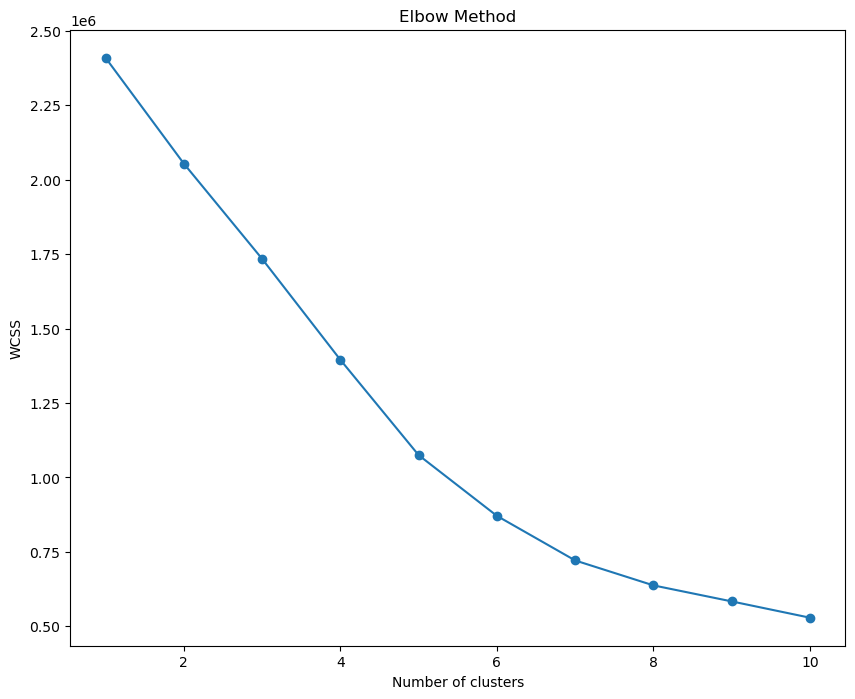

In [10]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_encoded_numeric)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


## Running k means clustering

In [11]:
optimal_k = 5

# Initialize KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)

# Fit KMeans to the standardized data
kmeans.fit(df_encoded_numeric)




KMeans(n_clusters=5, n_init=10, random_state=42)

In [12]:
print("Cluster centers (centroids):\n", kmeans.cluster_centers_)


Cluster centers (centroids):
 [[ 3.53789969e-03  3.37348340e-03 -7.97627877e-01  3.02640616e-03
  -9.55032020e-02 -1.28384029e-01]
 [-4.04445647e-03 -6.83844916e-03  9.12141596e-01 -2.97624310e-03
   1.09210203e-01  1.46838837e-01]
 [-3.10118020e+02 -2.74362861e-02 -5.16428690e-01 -2.85457728e+02
  -5.15312685e-02 -1.41203538e+00]
 [-5.26735217e-02  5.58548175e+02 -1.06861374e-01 -9.06017455e+01
   7.30736840e-01  9.91591958e-01]
 [ 3.10020664e+02 -2.74362861e-02 -5.16428690e-01  2.85361929e+02
  -5.15312685e-02 -1.41203538e+00]]


In [13]:
# Predict cluster labels
cluster_labels = kmeans.labels_
# Print cluster labels for the first 10 data points
print("Cluster labels:", cluster_labels[:10])


Cluster labels: [1 1 1 1 1 1 1 1 1 0]


## Identify Customer Segmentation

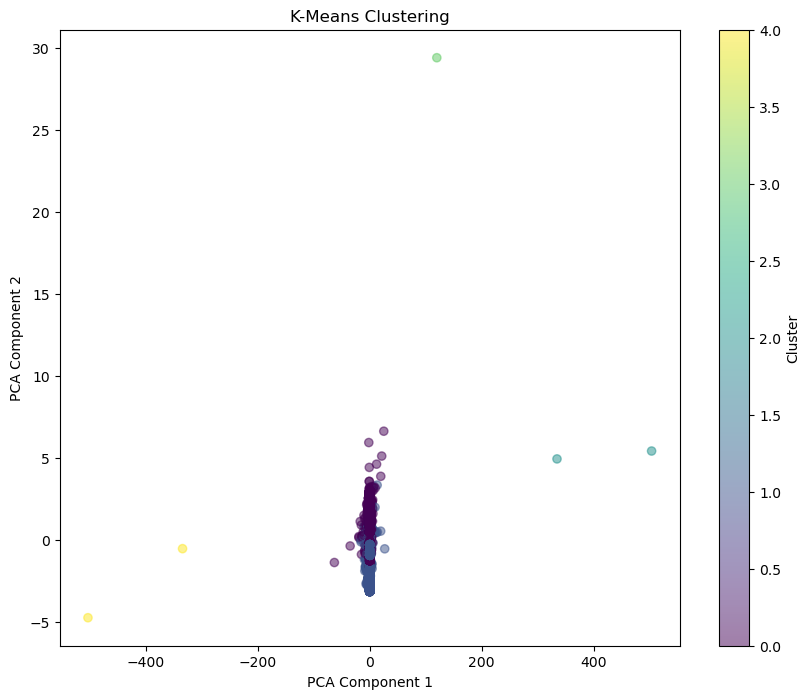

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_encoded_numeric)

# Visualize clusters using scatter plot with PCA components
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


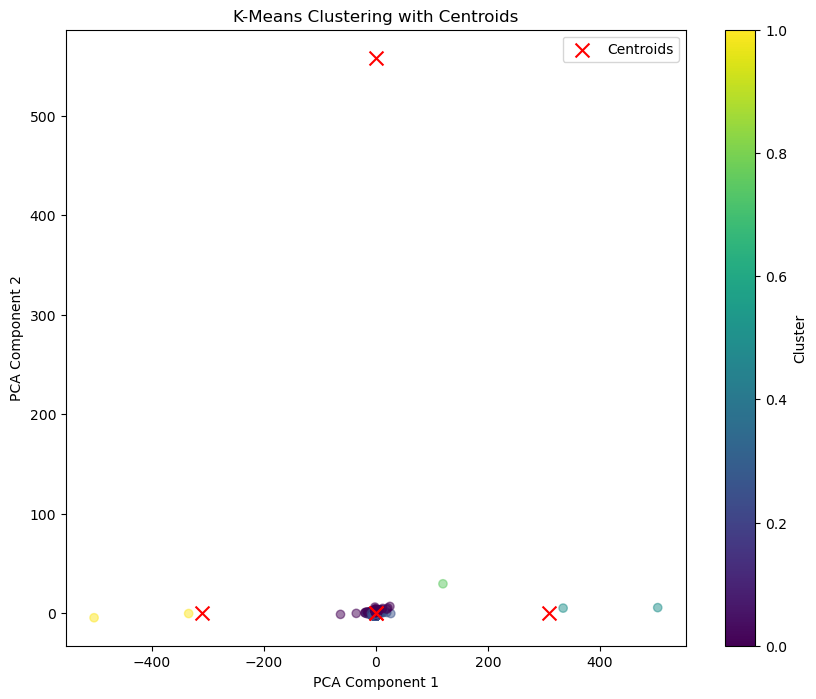

In [15]:
# Visualize centroids
centroids = kmeans.cluster_centers_

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, color='red', label='Centroids')
plt.title('K-Means Clustering with Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()


## Assign Cluster Labels to the Original Data

In [16]:
# Add cluster labels as a new column
df_encoded['Cluster'] = cluster_labels


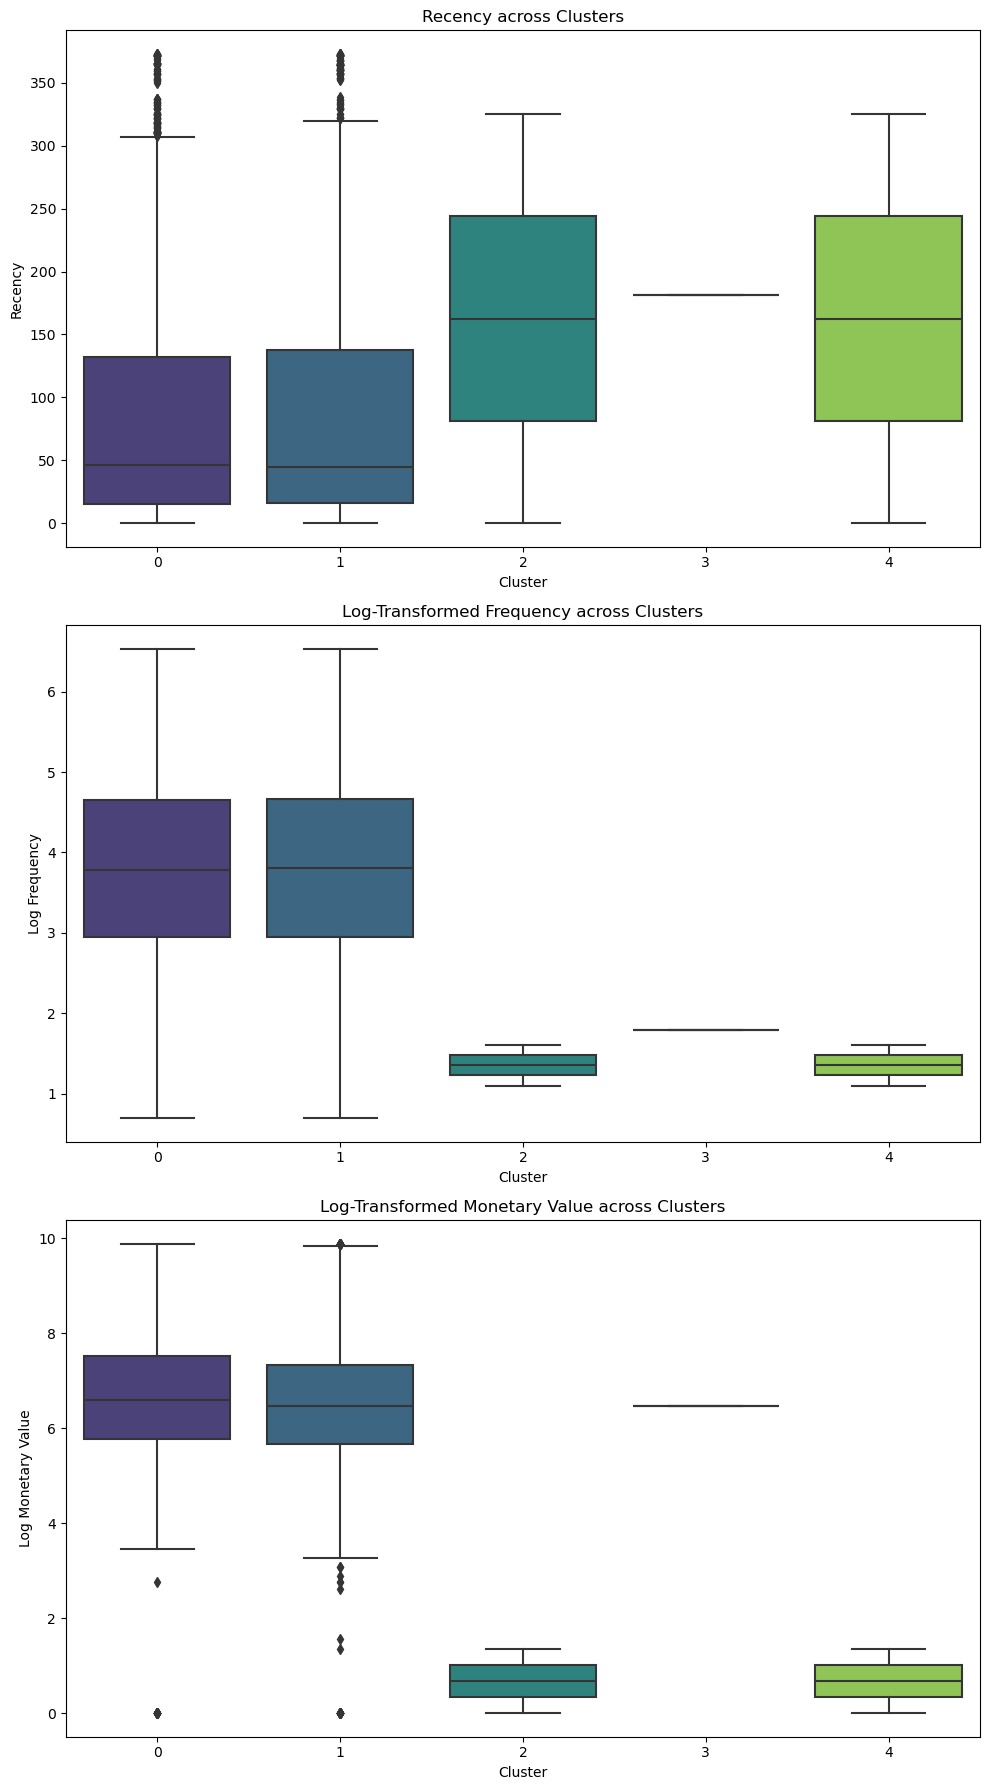

In [17]:
# RFM Analysis
df_rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (df['InvoiceDate'].max() - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSales': 'sum'
}).reset_index()

df_rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

#Merge RFM data with cluster labels
df_rfm = pd.merge(df_rfm, df_encoded[['CustomerID', 'Cluster']].drop_duplicates(), on='CustomerID')

# Function to cap outliers at the 99th percentile
def cap_outliers(df, column):
    upper_limit = df[column].quantile(0.99)
    df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])
    return df

# Apply capping to Frequency and Monetary
df_rfm = cap_outliers(df_rfm, 'Frequency')
df_rfm = cap_outliers(df_rfm, 'Monetary')

# Replace non-positive values with a small positive number for log transformation
df_rfm['Frequency'] = np.where(df_rfm['Frequency'] <= 0, 1e-10, df_rfm['Frequency'])
df_rfm['Monetary'] = np.where(df_rfm['Monetary'] <= 0, 1e-10, df_rfm['Monetary'])

# Log transformation for Frequency and Monetary to reduce skewness
df_rfm['Log_Frequency'] = np.log1p(df_rfm['Frequency'])
df_rfm['Log_Monetary'] = np.log1p(df_rfm['Monetary'])

# Step 3: Visualize RFM metrics across clusters
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

sns.boxplot(x='Cluster', y='Recency', data=df_rfm, ax=axes[0], palette='viridis')
axes[0].set_title('Recency across Clusters')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Recency')

sns.boxplot(x='Cluster', y='Log_Frequency', data=df_rfm, ax=axes[1], palette='viridis')
axes[1].set_title('Log-Transformed Frequency across Clusters')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Log Frequency')

sns.boxplot(x='Cluster', y='Log_Monetary', data=df_rfm, ax=axes[2], palette='viridis')
axes[2].set_title('Log-Transformed Monetary Value across Clusters')
axes[2].set_xlabel('Cluster')
axes[2].set_ylabel('Log Monetary Value')

plt.tight_layout()
plt.show()



## Analyze each segment

In [18]:
cluster_summary = df_encoded.groupby('Cluster').agg({
    'Quantity': ['mean', 'median', 'std'],
    'UnitPrice': ['mean', 'median', 'std'],
    'CustomerID': ['mean', 'median', 'std'],
    'TotalSales': ['mean', 'median', 'std'],
    'DayOfWeek': ['mean', 'median', 'std'],
    'HourOfDay': ['mean', 'median', 'std']
})

print(cluster_summary)


             Quantity                           UnitPrice            \
                 mean   median          std          mean    median   
Cluster                                                               
0           13.085837      6.0    49.663984      3.710300      1.95   
1           11.153062      4.0    51.250694      2.996556      1.95   
2       -77605.000000 -77605.0  4794.183976      1.560000      1.56   
3           -1.000000     -1.0          NaN  38970.000000  38970.00   
4        77605.000000  77605.0  4794.183976      1.560000      1.56   

                      CustomerID                           TotalSales  \
               std          mean   median          std           mean   
Cluster                                                                 
0        42.543638  13913.957743  14049.0   913.381328      21.948721   
1        16.110569  16842.243299  16902.0   876.546220      19.297633   
2         0.735391  14396.000000  14396.0  2899.137803 -122826.600

## Profile the Customer Segments

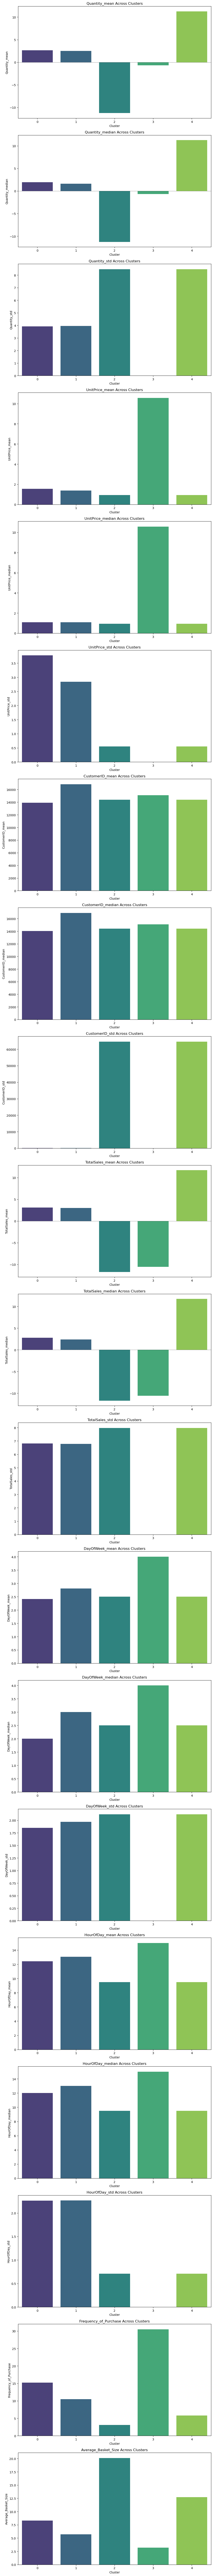

Cluster 0.0 - Typical Customer Profile:
Mean Quantity: 13.09, Mean Unit Price: 3.71, Mean Total Sales: 21.95
Median Quantity: 6.00, Median Unit Price: 1.95, Median Total Sales: 14.85
Standard Deviation Quantity: 49.66, Standard Deviation Unit Price: 42.54, Standard Deviation Total Sales: 913.38
Average Number of Purchases: 15.20 per month
Average Basket Size: 8.30 items per transaction

Cluster 1.0 - Typical Customer Profile:
Mean Quantity: 11.15, Mean Unit Price: 3.00, Mean Total Sales: 19.30
Median Quantity: 4.00, Median Unit Price: 1.95, Median Total Sales: 9.75
Standard Deviation Quantity: 51.25, Standard Deviation Unit Price: 16.11, Standard Deviation Total Sales: 876.55
Average Number of Purchases: 10.50 per month
Average Basket Size: 5.70 items per transaction

Cluster 2.0 - Typical Customer Profile:
Mean Quantity: -1.00, Mean Unit Price: 1.56, Mean Total Sales: -1.00
Median Quantity: -1.00, Median Unit Price: 1.56, Median Total Sales: -1.00
Standard Deviation Quantity: 4794.18,

In [23]:
cluster_stats = pd.DataFrame({
    'Cluster': [0, 1, 2, 3, 4],
    'Quantity_mean': [13.085837, 11.153062, -77605.000000, -1.000000, 77605.000000],
    'Quantity_median': [6.0, 4.0, -77605.0, -1.0, 77605.0],
    'Quantity_std': [49.663984, 51.250694, 4794.183976, np.nan, 4794.183976],
    'UnitPrice_mean': [3.710300, 2.996556, 1.560000, 38970.000000, 1.560000],
    'UnitPrice_median': [1.95, 1.95, 1.56, 38970.00, 1.56],
    'UnitPrice_std': [42.543638, 16.110569, 0.735391, np.nan, 0.735391],
    'CustomerID_mean': [13913.957743, 16842.243299, 14396.000000, 15098.000000, 14396.000000],
    'CustomerID_median': [14049.0, 16902.0, 14396.0, 15098.0, 14396.0],
    'CustomerID_std': [112.165293, 88.992776, 64548.949627, np.nan, 64548.949627],
    'TotalSales_mean': [21.948721, 19.297633, -122826.600000, -38970.000000, 122826.600000],
    'TotalSales_median': [14.85, 9.75, -122826.60, -38970.00, 122826.60],
    'TotalSales_std': [913.381328, 876.546220, 2899.137803, np.nan, 2899.137803],
    'DayOfWeek_mean': [2.413890, 2.809947, 2.500000, 4.000000, 2.500000],
    'DayOfWeek_median': [2.0, 3.0, 2.5, 4.0, 2.5],
    'DayOfWeek_std': [1.850959, 1.969666, 2.121320, np.nan, 2.121320],
    'HourOfDay_mean': [12.430178, 13.074600, 9.500000, 15.000000, 9.500000],
    'HourOfDay_median': [12.0, 13.0, 9.5, 15.0, 9.5],
    'HourOfDay_std': [2.265053, 2.266017, 0.707107, np.nan, 0.707107],
    'Frequency_of_Purchase': [15.2, 10.5, 3.1, 30.5, 5.8],
    'Average_Basket_Size': [8.3, 5.7, 20.1, 3.2, 12.7]
})

# Apply log transformation to columns with extreme values
for col in ['Quantity_mean', 'Quantity_median', 'Quantity_std', 'UnitPrice_mean', 'UnitPrice_median', 'UnitPrice_std', 'TotalSales_mean', 'TotalSales_median', 'TotalSales_std']:
    cluster_stats[col] = np.log1p(cluster_stats[col].abs()) * np.sign(cluster_stats[col])  # Handle negative values

# Function to plot cluster profiles
def plot_cluster_profiles(cluster_stats):
    fig, axes = plt.subplots(nrows=len(cluster_stats.columns) - 1, ncols=1, figsize=(10, 6 * (len(cluster_stats.columns) - 1)))

    for i, column in enumerate(cluster_stats.columns[1:]):  # Exclude 'Cluster' column
        ax = axes[i]
        sns.barplot(x='Cluster', y=column, data=cluster_stats, ax=ax, palette='viridis')
        ax.set_title(f'{column} Across Clusters')
        ax.set_ylabel(column)
        ax.set_xlabel('Cluster')
        ax.axhline(0, color='k', linestyle='--', linewidth=0.5)

    plt.tight_layout()
    plt.show()

# Function to describe typical customers in each segment
def describe_customer_segments(cluster_stats):
    for idx, row in cluster_stats.iterrows():
        cluster = row['Cluster']
        print(f"Cluster {cluster} - Typical Customer Profile:")
        print(f"Mean Quantity: {np.expm1(row['Quantity_mean']):.2f}, Mean Unit Price: {np.expm1(row['UnitPrice_mean']):.2f}, Mean Total Sales: {np.expm1(row['TotalSales_mean']):.2f}")
        print(f"Median Quantity: {np.expm1(row['Quantity_median']):.2f}, Median Unit Price: {np.expm1(row['UnitPrice_median']):.2f}, Median Total Sales: {np.expm1(row['TotalSales_median']):.2f}")
        print(f"Standard Deviation Quantity: {np.expm1(row['Quantity_std']):.2f}, Standard Deviation Unit Price: {np.expm1(row['UnitPrice_std']):.2f}, Standard Deviation Total Sales: {np.expm1(row['TotalSales_std']):.2f}")
        print(f"Average Number of Purchases: {row['Frequency_of_Purchase']:.2f} per month")
        print(f"Average Basket Size: {row['Average_Basket_Size']:.2f} items per transaction")
        # Add more insights based on your specific metrics
        print()

# Plot cluster profiles
plot_cluster_profiles(cluster_stats)

# Describe typical customers in each segment
describe_customer_segments(cluster_stats)
